In [1]:
import numpy as np
import pandas as  pd
dataset = pd.read_excel(r"Dry_Bean_Dataset.xlsx")

print(dataset.Class.unique())

['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


In [2]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [3]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#NORMALİZASYON (verileri 0-1 arasına sıkıştırma)
scalar=MinMaxScaler()
dataset[["Area","Perimeter","MajorAxisLength","MinorAxisLength","AspectRation","Eccentricity","ConvexArea","EquivDiameter","Extent","Solidity","roundness","Compactness","ShapeFactor1",
         "ShapeFactor2","ShapeFactor3","ShapeFactor4"]]=scalar.fit_transform(dataset[["Area","Perimeter","MajorAxisLength","MinorAxisLength","AspectRation","Eccentricity","ConvexArea","EquivDiameter","Extent","Solidity","roundness","Compactness","ShapeFactor1",
         "ShapeFactor2","ShapeFactor3","ShapeFactor4"]])

In [4]:
xSample = dataset.iloc[:,0:16]
ySample = dataset.Class


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

ySample = le.fit_transform(ySample)
ySampleName = le.classes_#!!!!  #category name
print(ySample)
print(ySampleName)

[5 5 5 ... 3 3 3]
['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']


In [6]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(xSample,ySample,test_size=0.2,random_state=42) 

print(f"""
    xTrain: {xTrain.shape},
    xTest: {xTest.shape}, 
    
    yTrain: {yTrain.shape},
    yTest: {yTest.shape}
    """)


    xTrain: (10888, 16),
    xTest: (2723, 16), 
    
    yTrain: (10888,),
    yTest: (2723,)
    


In [7]:
from sklearn. neighbors import KNeighborsClassifier as NGC
from sklearn.metrics import classification_report, confusion_matrix

classifier_model = NGC(n_neighbors=5,metric="minkowski", p=1) #hiperparametre optimizasyonları düzenlenebilir!
classifier_model.fit(xTrain,yTrain)

y_test_prediction = classifier_model.predict(xTest)

In [8]:
#Desicion Tree ALgorithm

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="gini", splitter="best",random_state=42)  #gini, entropi, 3rd?
model.fit(xTrain,yTrain)
y_test_prediction = model.predict(xTest)

In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

#RandomForestClassifier 
model = RandomForestClassifier(n_estimators = 1200) #estimators: kaç tane karar ağacıyla belirlenecğine bakar
model.fit(xTrain,yTrain)
y_test_prediction = model.predict(xTest)

In [10]:
from sklearn.svm import SVC

classifier_model = SVC(C=5, kernel='rbf',gamma=0.1)
classifier_model.fit(xTrain,yTrain)
y_test_prediction =  model.predict(xTest)

In [11]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(xTrain,yTrain)
y_test_prediction =  model.predict(xTest)
print(y_test_prediction)
print(yTest)

[3 6 3 ... 3 6 3]
[5 0 5 ... 3 2 6]


In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0,max_iter=1000,solver="newton-cg")
model.fit(xTrain,yTrain)
y_test_prediction =  model.predict(xTest)
print(y_test_prediction)
print(yTest)

[5 0 5 ... 3 2 6]
[5 0 5 ... 3 2 6]


              precision    recall  f1-score   support

           1       0.94      0.89      0.91       261
           2       1.00      1.00      1.00       117
           3       0.93      0.94      0.94       317
           4       0.91      0.90      0.90       671
           5       0.97      0.96      0.97       408
           6       0.95      0.93      0.94       413
           7       0.84      0.89      0.87       536

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



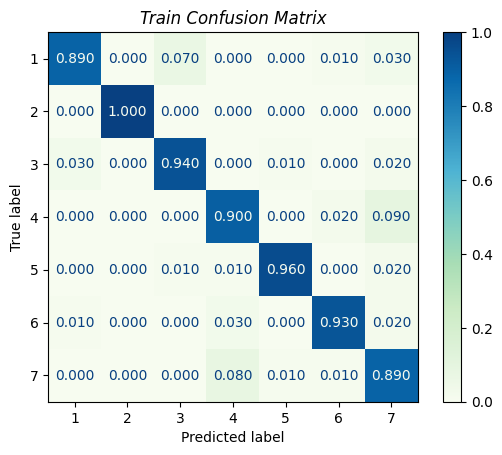

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
print(classification_report(yTest,y_test_prediction, target_names=["1","2","3","4","5","6","7"]))
cm = confusion_matrix(yTest, y_test_prediction,normalize="true").round(2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["1","2","3","4","5","6","7"])
disp = disp.plot(cmap = plt.cm.GnBu, values_format='.3f')
plt.title(f"Train Confusion Matrix", style="italic")
plt.show()

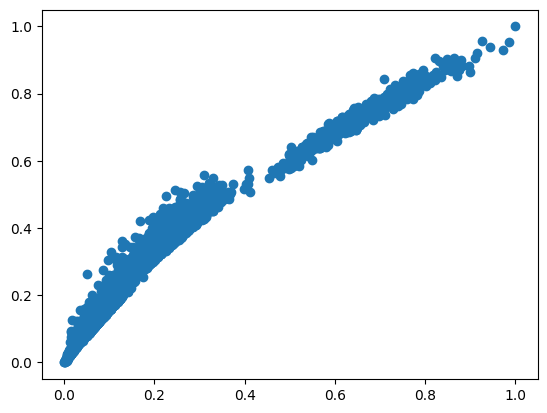

In [14]:
import matplotlib.pyplot as plt

plt.scatter(dataset.Area, dataset.Perimeter)
plt.show()


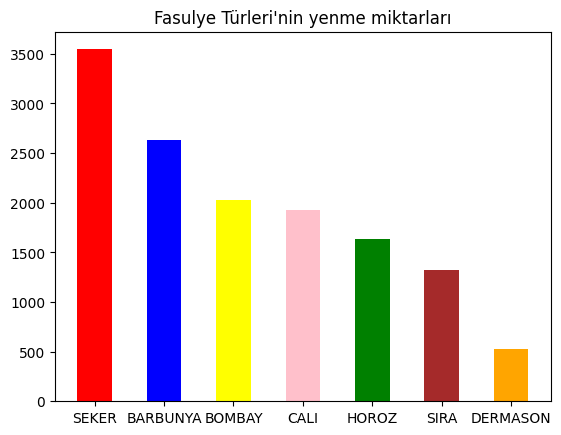

In [15]:
import numpy as np
import matplotlib.pyplot as plt

plt.title("Fasulye Türleri'nin yenme miktarları")
x = dataset.Class.unique()
y = dataset.Class.value_counts()

plt.bar(x,y,color=["red","blue","yellow","pink","green","brown","orange"], width=0.5)

plt.show()

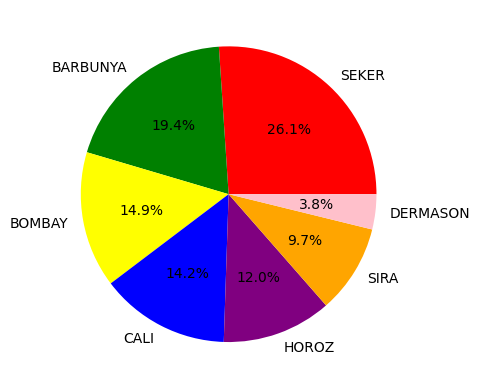

In [16]:
plt.pie(y,labels=x, colors=["Red","Green","Yellow","Blue","Purple","Orange","Pink"], autopct="%1.1f%%")
plt.show()